In [1]:
import numpy as np
import pailab.tools.interpretation as interpretation
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.basicConfig(level=logging.ERROR)

In [2]:

X=np.concatenate([np.random.random(size=(100,2)), np.random.random(size=(100,2))+1.0])


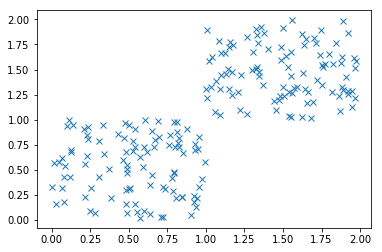

In [3]:
plt.plot(X[:,0],X[:,1],'x')

In [4]:
gamma = 2.0
prototypes, criticisms = interpretation._compute_prototypes(X, n_prototypes=10, n_criticisms = 0, witness_penalty = 10.0, metric = 'rbf')

[147, 58, 129]


Exception: Cannot find a new prototype.

In [8]:
prototypes = [147, 58, 129]
cost = interpretation._compute_MMD2(X, prototypes, metric='rbf')
for i in range(X.shape[0]):
    if i not in prototypes:
        tmp=[p for p in prototypes] 
        tmp.append(i)
        new_cost = interpretation._compute_MMD2(X, tmp, metric='rbf')
        if new_cost < cost:
            print(str(i) + ' new_cost: '+ str(new_cost) + ' cost_diff: ' + str(new_cost-cost) )

In [ ]:
#plt.plot(X[:,0],X[:,1],'x')
plt.plot(X[prototypes,0],X[prototypes,1],'o')
plt.plot(X[criticisms,0],X[criticisms,1],'*')
for i in range(len(prototypes)):
    print(str(i) + '   : ' + str(interpretation._compute_MMD2(X, prototypes[0:i+1],  metric = 'rbf')))
#prototypes

In [ ]:
from sklearn.metrics.pairwise import pairwise_kernels
depp = pairwise_kernels(X, metric='rbf', gamma = 10.0)
depp.shape

In [ ]:
depp[0][[1,2,3,4,5,6,7,8,9,10]].shape

In [ ]:
np.ix_([1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10])